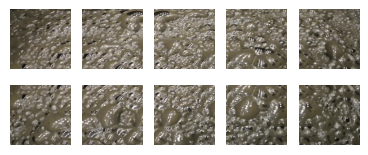

Number of generated images: 10


In [49]:
from nodes.MakeCropsDetectThem import MakeCropsDetectThem
from nodes.CombineDetectionsNode import CombineDetectionsNode
from functions_extra import visualize_results
import cv2
import matplotlib.pyplot as plt

img_path = 'test_images/img_6-003.jpg'
img = cv2.imread(img_path)

element = MakeCropsDetectThem(image=img, model_path="best.pt", segment=True, show_crops=True, shape_x=450, shape_y=450, resize_results=False)

In [50]:
element.crops[2].detected_xyxy_real

[[675, 90, 771, 179],
 [994, 310, 1125, 445],
 [762, 211, 922, 355],
 [861, 297, 966, 360],
 [675, 6, 879, 109],
 [899, 238, 1011, 309],
 [892, 10, 1084, 76],
 [938, 366, 1007, 433],
 [675, 310, 719, 383]]

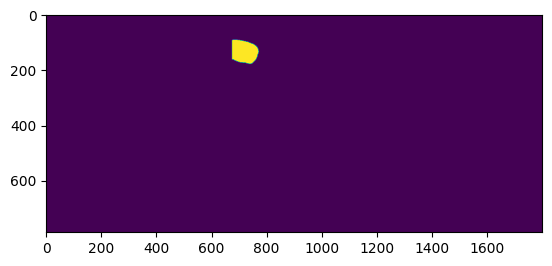

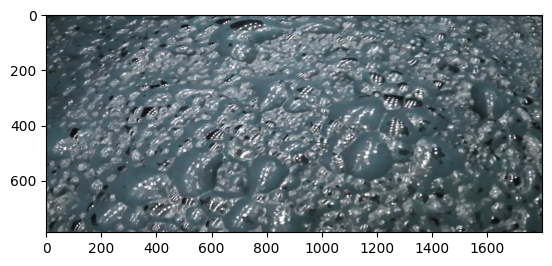

In [51]:
plt.imshow(element.crops[2].detected_masks_real[0]);
plt.show()
plt.imshow(element.crops[2].source_image_resized);

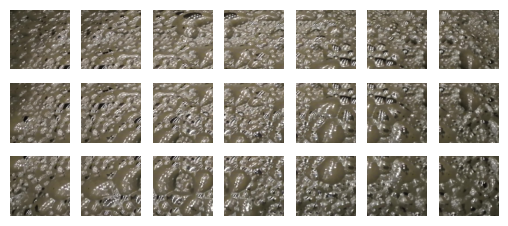

Number of generated images: 21


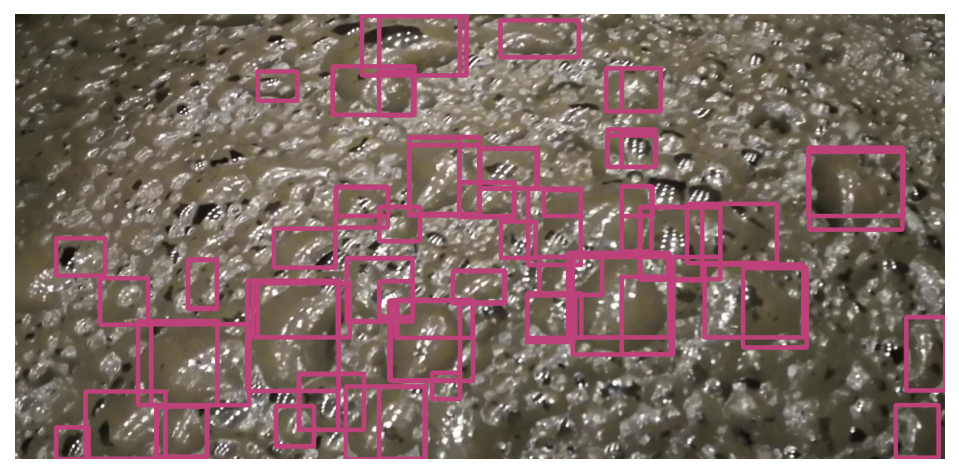

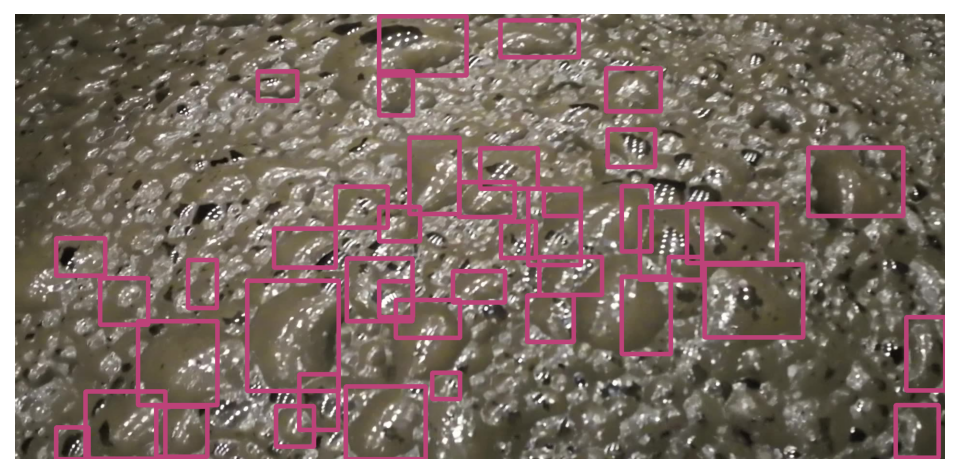

In [52]:
element_crops = MakeCropsDetectThem(image=img, model_path="best.pt", imgsz=608,  segment=False, show_crops=True,
            shape_x=400, shape_y=400, overlap_x=40, overlap_y=40, conf=0.7, resize_results=False)
result = CombineDetectionsNode(element_crops, nms_iou=0.3, match_metric='IOU')


visualize_results(
    img=result.image,
    confidences=result.detected_conf_list_full,
    boxes=result.detected_xyxy_list_full,
    masks=result.detected_masks_list_full,
    classes_ids=result.detected_cls_id_list_full,
    classes_names=result.detected_cls_names_list_full,
    segment=False,
    thickness=8,
    font_scale=2.5,
    fill_mask=False,
    show_boxes=True,
    show_class=False,
    delta_colors=3,
)


visualize_results(
    img=result.image,
    confidences=result.filtered_confidences,
    boxes=result.filtered_boxes,
    masks=result.filtered_masks,
    classes_ids=result.filtered_classes_id,
    classes_names=result.filtered_classes_names,
    segment=False,
    thickness=8,
    font_scale=2.5,
    fill_mask=False,
    show_boxes=True,
    show_class=False,
    delta_colors=3,
)

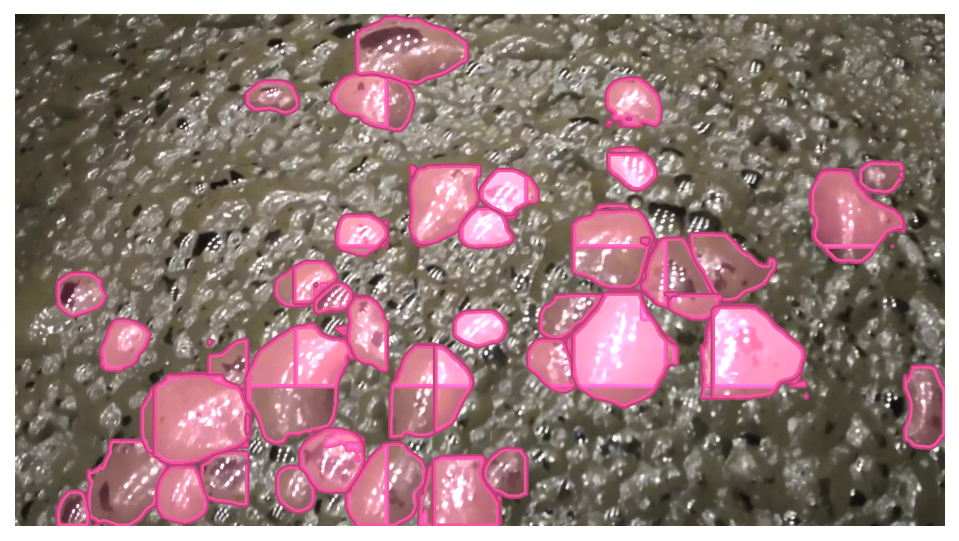

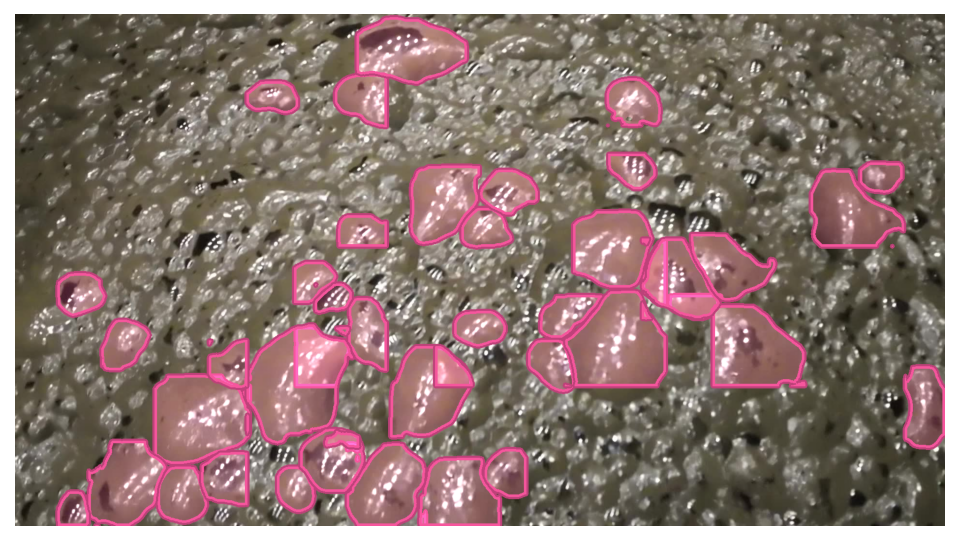

In [54]:
element_crops = MakeCropsDetectThem(image=img, model_path="best.pt", segment=True, show_crops=False, shape_x=450,
     shape_y=450, overlap_x=40, overlap_y=40, conf=0.7, resize_results=False)
result = CombineDetectionsNode(element_crops, nms_iou=0.3, match_metric='IOU')


visualize_results(
    img=result.image,
    confidences=result.detected_conf_list_full,
    boxes=result.detected_xyxy_list_full,
    masks=result.detected_masks_list_full,
    classes_ids=result.detected_cls_id_list_full,
    classes_names=result.detected_cls_names_list_full,
    segment=True,
    thickness=8,
    font_scale=2.5,
    fill_mask=True,
    show_boxes=False,
    show_class=False,
    delta_colors=3,
)


visualize_results(
    img=result.image,
    confidences=result.filtered_confidences,
    boxes=result.filtered_boxes,
    masks=result.filtered_masks,
    classes_ids=result.filtered_classes_id,
    classes_names=result.filtered_classes_names,
    segment=True,
    thickness=8,
    font_scale=2.5,
    fill_mask=True,
    show_boxes=False,
    show_class=False,
    delta_colors=3,
)


---

Пример как один кроп обрабатывается:

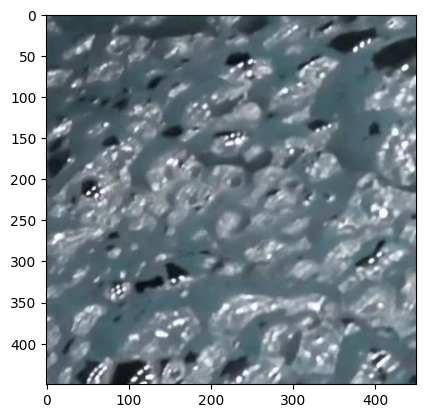

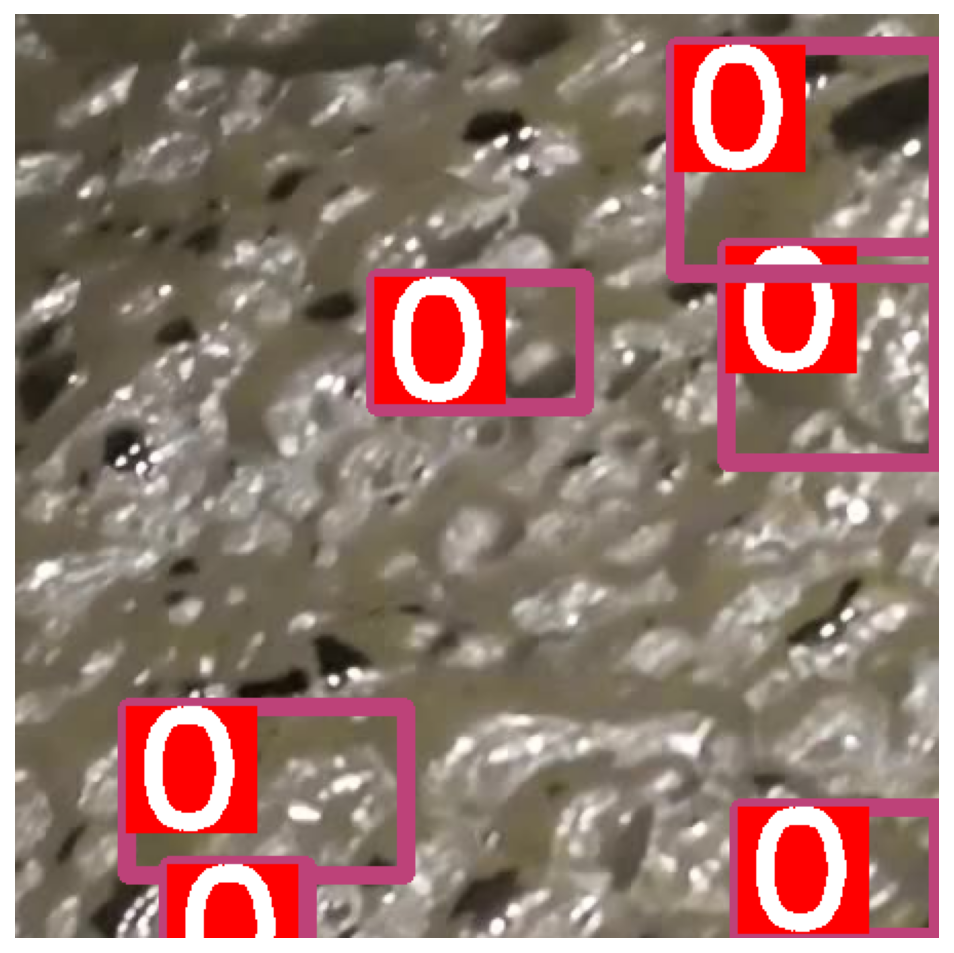

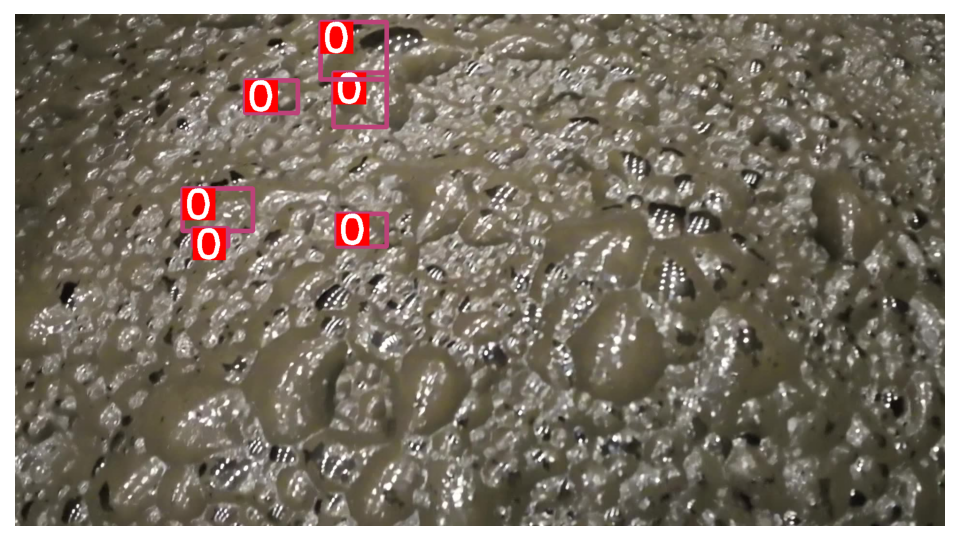

In [44]:
i = 1
plt.imshow(element_crops.crops[i].crop)
plt.show()


visualize_results(
    img=element_crops.crops[i].crop,
    confidences=element_crops.crops[i].detected_conf,
    boxes=element_crops.crops[i].detected_xyxy,
    classes_ids=element_crops.crops[i].detected_cls,
    segment=False,
    thickness=8,
    font_scale=2.5,
    fill_mask=True,
    show_boxes=True,
    delta_colors=3,
)

visualize_results(
    img=element_crops.crops[i].source_image_resized,
    confidences=element_crops.crops[i].detected_conf,
    boxes=element_crops.crops[i].detected_xyxy_real,
    classes_ids=element_crops.crops[i].detected_cls,
    segment=False,
    thickness=8,
    font_scale=2.5,
    fill_mask=True,
    show_boxes=True,
    delta_colors=3,
)